# logistic-regression-from-scratch

[reference](https://beckernick.github.io/logistic-regression-from-scratch/)



In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(12)
num_observations = 5000

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

simulated_separableish_features = np.vstack((x1, x2)).astype(np.float32)
simulated_labels = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))

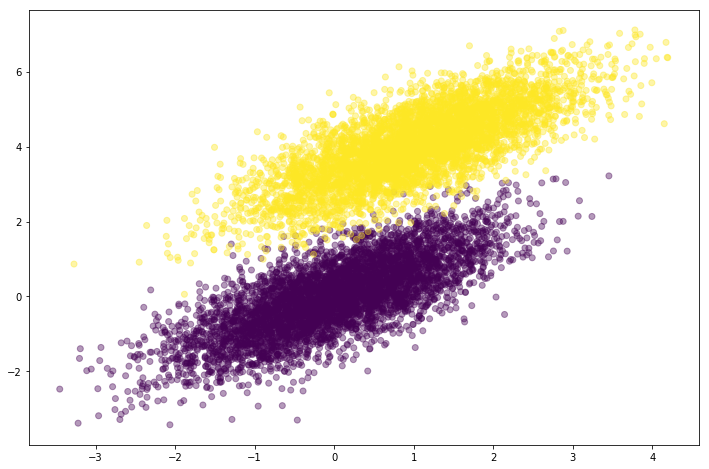

In [2]:
plt.figure(figsize=(12,8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c = simulated_labels, alpha = .4)

In [12]:
print(simulated_separableish_features.shape)
simulated_separableish_features

(10000, 2)


array([[-0.2015173 , -0.6833582 ],
       [ 0.37451947, -0.8280822 ],
       [-0.16189468, -1.2471066 ],
       ...,
       [ 2.3255963 ,  4.181329  ],
       [ 0.24707289,  4.2294044 ],
       [ 1.7190224 ,  4.8253503 ]], dtype=float32)

In [10]:
print(simulated_labels.shape)
simulated_labels

(10000,)


array([0., 0., 0., ..., 1., 1., 1.])

In [13]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

In [14]:
def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

In [19]:
def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        
        # Print log-likelihood every so often
        if step % 10000 == 0:
            print(log_likelihood(features, target, weights))
        
    return weights

In [20]:
weights = logistic_regression(simulated_separableish_features, simulated_labels, num_steps = 300000, learning_rate = 5e-5, add_intercept=True)

-4346.264779152365
-148.7067227680535
-142.9649362310784
-141.5453030715737
-141.06031965930796
-140.87031585891606
-140.7902591275381
-140.75505002269915
-140.73914503180956
-140.73183498915876
-140.72843666694828
-140.72684471255332
-140.72609508950472
-140.725740860523
-140.72557306887177
-140.72549345786172
-140.72545564250746
-140.72543766614328
-140.72542911609156
-140.72542504794774
-140.72542311181698
-140.72542219020232
-140.7254217514527
-140.72542154256135
-140.7254214431011
-140.72542139574284
-140.72542137319252
-140.7254213624546
-140.7254213573413
-140.7254213549065


In [21]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, C = 1e15)
clf.fit(simulated_separableish_features, simulated_labels)

print(clf.intercept_, clf.coef_)
print(weights)

[-13.99400797] [[-5.02712572  8.23286799]]
[-14.09225541  -5.05899648   8.28955762]


C:\Users\bruce\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


What's the Accuracy

In [23]:
final_scores = np.dot(np.hstack((np.ones((simulated_separableish_features.shape[0], 1)),
                                 simulated_separableish_features)), weights)
preds = np.round(sigmoid(final_scores))

print('Accuracy from scratch: {0}'.format((preds == simulated_labels).sum().astype(float) / len(preds)))
print('Accuracy from sk-learn: {0}'.format(clf.score(simulated_separableish_features, simulated_labels)))

Accuracy from scratch: 0.9948
Accuracy from sk-learn: 0.9948


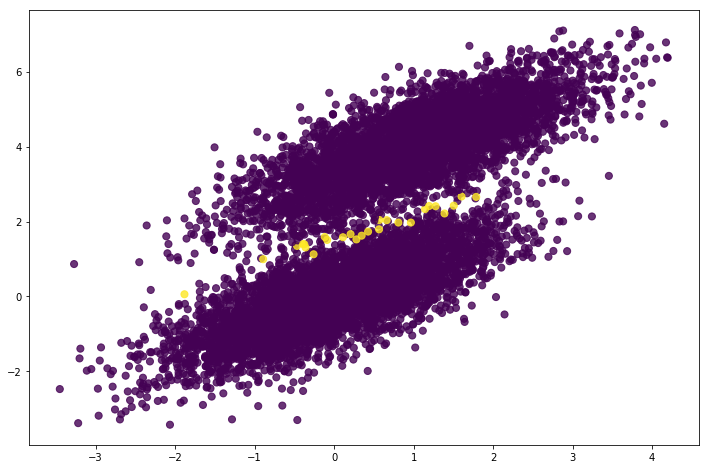

In [24]:

plt.figure(figsize = (12, 8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c = preds == simulated_labels - 1, alpha = .8, s = 50)